# Teste de Classificadores com ajuste de peso e modelos de arvore com up/downsampling 

O objetivo é testar os modelos XGBoost e adaBoost sem sampling e a floresta aleatoria e arvore de decisão com sampling, analisar qual deles tem a melhor metrica de recall para o banco de dados com todas as 4 tabelas e qual tem o melhor ponto de cotovelo na curva recall-precision.

## Preparar os dados e criar classe de processamento 

### Importando bibliotecas e dados

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
%load_ext autoreload
%autoreload 2

import os, sys

#Importing path to main folder, subtitute with your own path
module_path = os.path.abspath(os.path.join('/Users/mhctds/visage-V1.1')) # or the path to your source code
sys.path.insert(0, module_path)


In [3]:
from src.data.DataProcessing import DataProcessing
from src.models.ModelProcessing import ModelProcessing
from src.metrics.MetricsProcessing import MetricsProcessing
from src.models.BertProcessing import BertProcessing

/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_denuncia_crime=pd.read_csv('/Users/mhctds/Cidade_Social/base de dados/base_apps_denuncia_crime.csv')
df_base_rocinha=pd.read_csv('/Users/mhctds/Cidade_Social/base de dados/base_rocinha_df.csv')
df_protestos_2013=pd.read_csv('/Users/mhctds/Cidade_Social/base de dados/protestos_2013_df.csv')
df_protestos_PMES=pd.read_csv('/Users/mhctds/Cidade_Social/base de dados/protestos_PMES.csv')

### Criar classe de processamento

### Unir dataframes e separar em features e target

In [5]:
df_vector=[df_base_rocinha,df_denuncia_crime,df_protestos_2013,df_protestos_PMES]
DataProcess=DataProcessing()
df_final=DataProcess.append_data(df_vector)
df_final.info()
print(df_final.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 2038 entries, 0 to 503
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 2038 non-null   object 
 1   Total(SUM)           2037 non-null   float64
 2   Classe de Violência  2038 non-null   object 
dtypes: float64(1), object(2)
memory usage: 63.7+ KB
                                                text  Total(SUM)  \
0  RT @tvjornalsbt: "Morte" denuncia a precarieda...         8.0   
1  RT @tvjornalsbt: "Morte" denuncia a precarieda...         8.0   
2  "Morte" denuncia a precariedade da BR-101, na ...         8.0   
3  Terremoto de 7.1 no México. Onde vivo não pass...         7.0   
4  RT @vinigrilo1: Moradores com medo e assustado...         8.0   

  Classe de Violência  
0                High  
1                High  
2                High  
3                High  
4                High  


In [6]:
df_final = df_final.drop_duplicates().reset_index()
target = df_final["Classe de Violência"]
tf_idf = DataProcess.text_preprocessing_nltk(df_final["text"])

## Testando Modelos de Classificação

### Modelo dummy

In [34]:
model=ModelProcessing.dummy_model(tf_idf,target)

['fit_time', 'score_time', 'test_accuracy', 'test_f1_weighted', 'test_precision_weighted', 'test_recall_weighted']
[0.0006356954574584961, 0.0027885198593139648, 0.682025974025974, 0.4651612346095463, 0.682025974025974, 0.5530949862475286]
best recall: 0.682025974025974
best accuracy: 0.682025974025974
best f1: 0.5530949862475286
best precision: 0.4651612346095463


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and bein

/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Mean APS: 0.5287560398043514
stardard deviation APS: 0.0015671769031098766


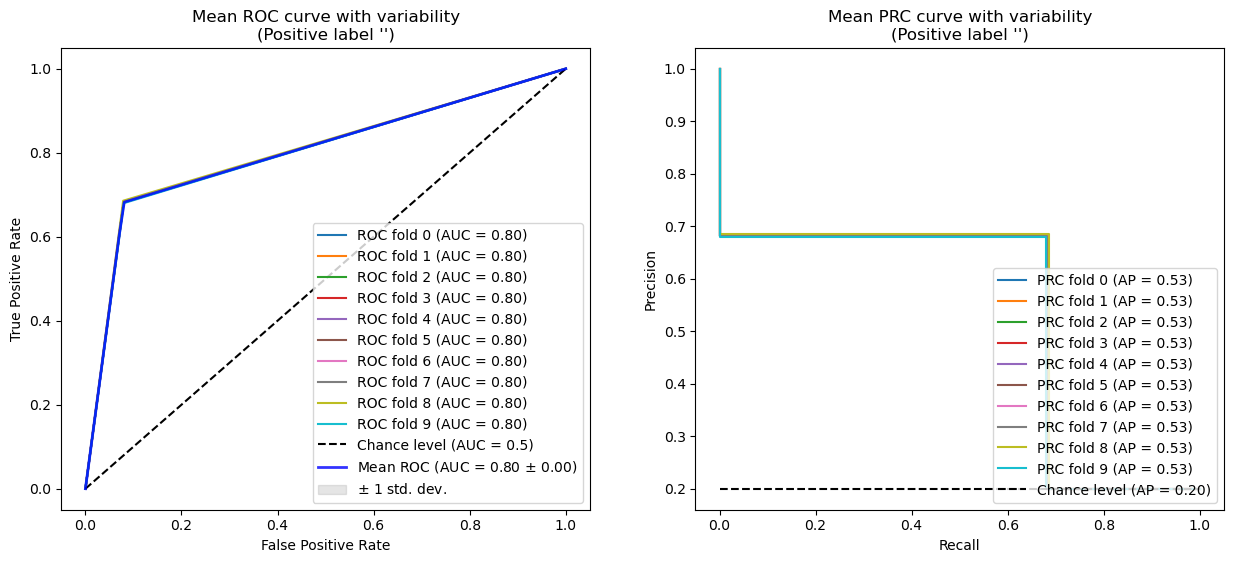

In [35]:
MetricsProcessing().evaluate_alt(model,tf_idf,target,n_splits=10)

### AdaBoost sem sampling

In [36]:
best_model=ModelProcessing.adaboost_model(tf_idf,target)

  0%|          | 0/99 [00:00<?, ?it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarn

best number of estimators: 6
best recall: 0.7417435064935065
best accuracy: 0.7417435064935065
best f1: 0.678423001396576
best precision: 0.6850081500162855


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Mean APS: 0.668690426578639
stardard deviation APS: 0.020685883782406385


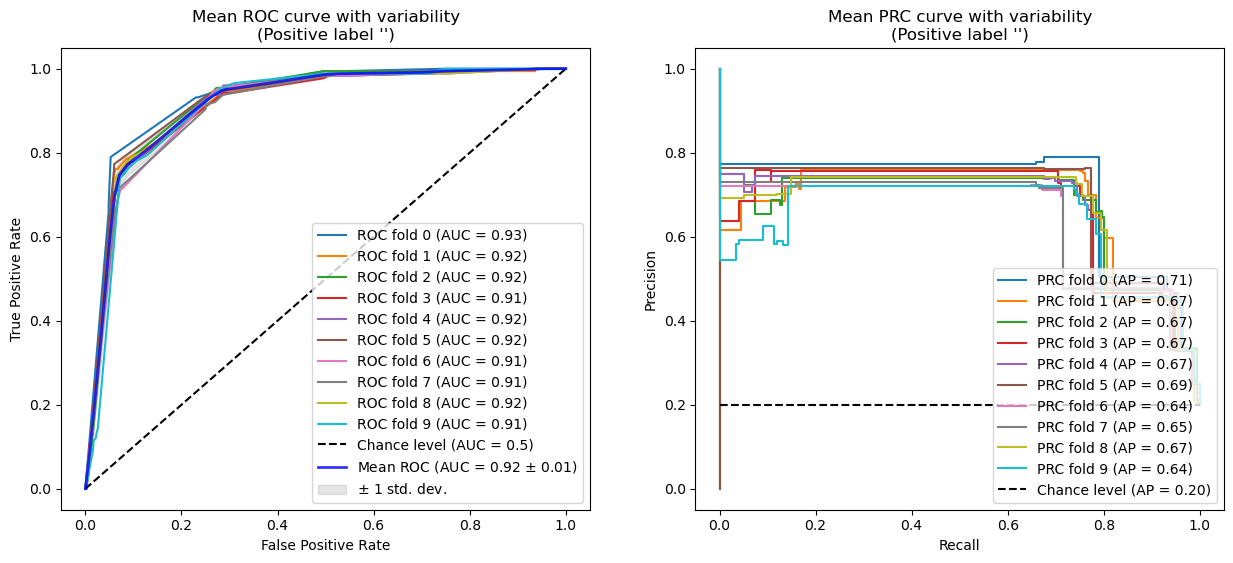

In [37]:
MetricsProcessing().evaluate_alt(best_model,tf_idf,target,n_splits=10)

### Floresta Aleatoria sem Sampling

In [38]:
best_model=ModelProcessing.florest_model(tf_idf,target)

  0%|          | 0/49 [00:00<?, ?it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarn

best depth: 28
best size: 12
best recall: 0.8043214285714285
best accuracy: 0.8043214285714285
best f1: 0.7661876935052967
best precision: 0.7744023607905361


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Mean APS: 0.8738837602204225
stardard deviation APS: 0.02019656580265669


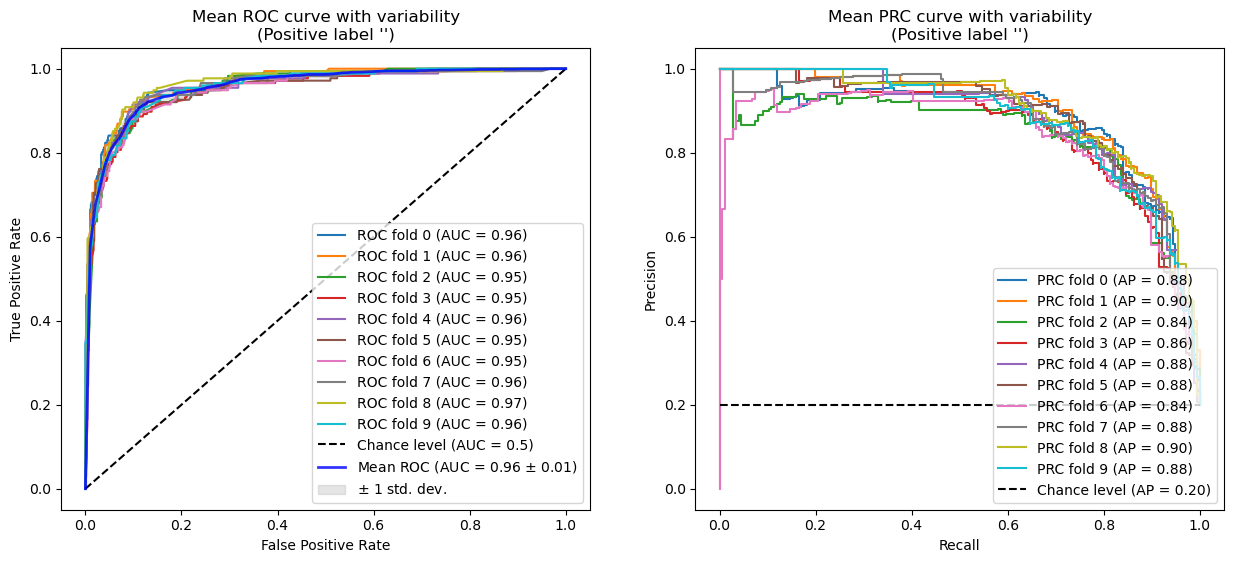

In [39]:
MetricsProcessing().evaluate_alt(best_model,tf_idf,target,n_splits=10)

### Arvore de decisão sem Sampling

In [40]:
tree_model=ModelProcessing.tree_model(tf_idf,target)

  0%|          | 0/99 [00:00<?, ?it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarn

best depth: 28
best recall: 0.8213993506493507
best accuracy: 0.8213993506493507
best f1: 0.8076858192223447
best precision: 0.8027554736741787


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Mean APS: 0.7057538330801811
stardard deviation APS: 0.027623922442271298


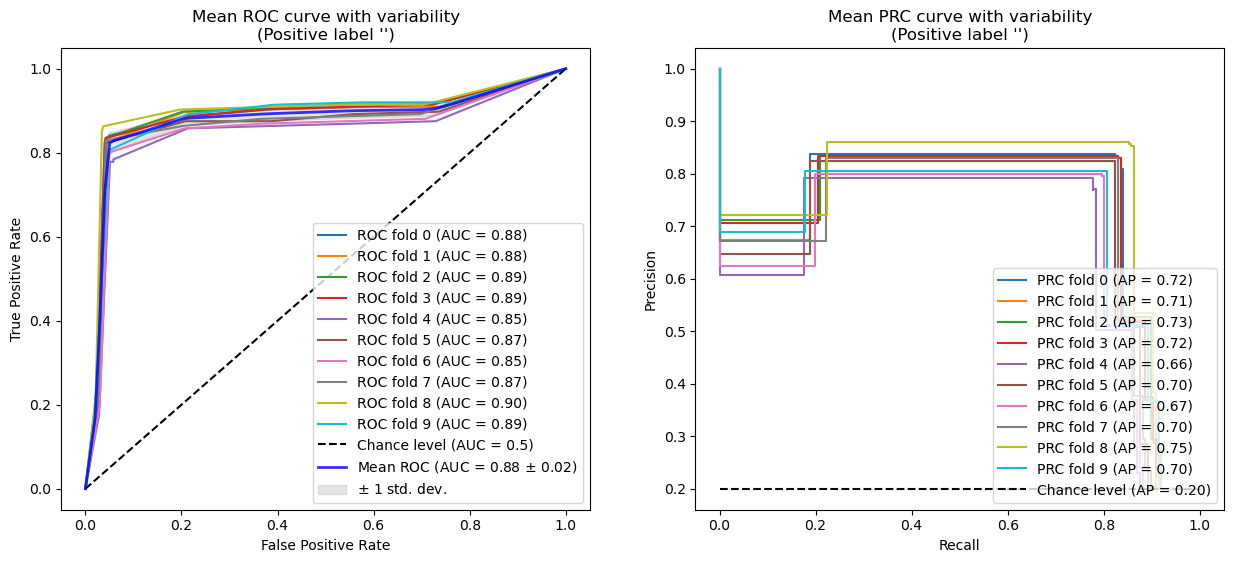

In [41]:
MetricsProcessing().evaluate_alt(tree_model,tf_idf,target,n_splits=10)

### Naive-Bayes sem sampling

In [42]:
model=ModelProcessing.naivebayes_model(tf_idf.toarray(),target)

/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in lab

['fit_time', 'score_time', 'test_accuracy', 'test_f1_weighted', 'test_precision_weighted', 'test_recall_weighted']
[0.04733872413635254, 0.01098494529724121, 0.7246623376623378, 0.7689766144406801, 0.7246623376623378, 0.7417112524360938]
best recall: 0.7246623376623378
best accuracy: 0.7246623376623378
best f1: 0.7417112524360938
best precision: 0.7689766144406801


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Mean APS: 0.580941811435318
stardard deviation APS: 0.03422382496065654


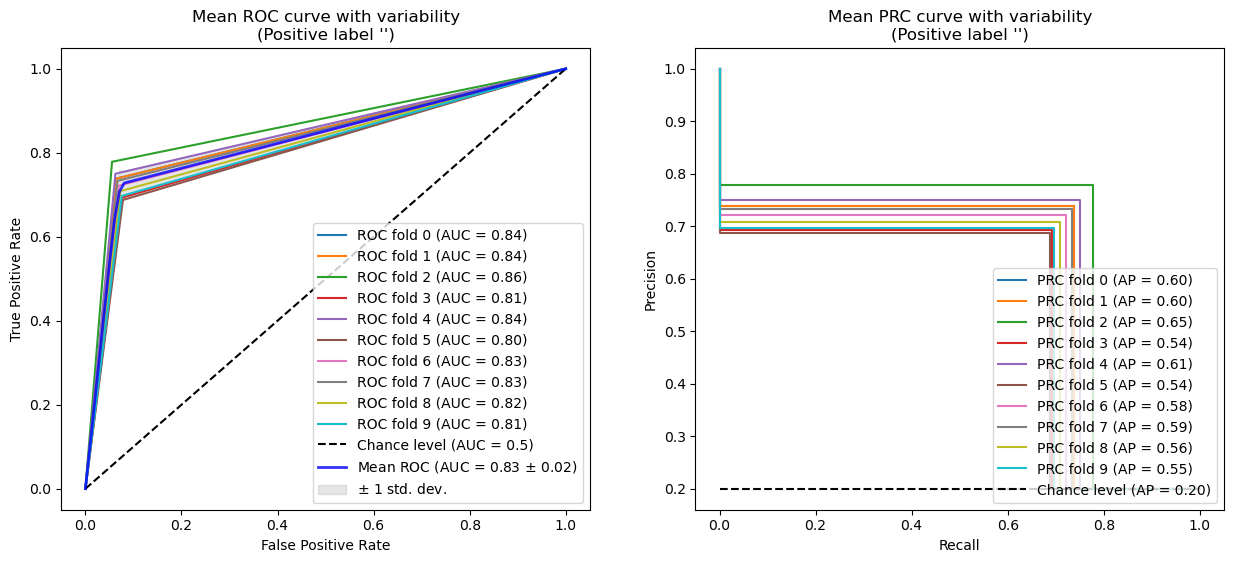

In [43]:
MetricsProcessing().evaluate_alt(model,tf_idf.toarray(),target,n_splits=10)

### BERTimbau sem sampling

/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1582 examples [00:00, 193468.49 examples/s]
Generating test split: 176 examples [00:00, 50026.94 examples/s]
Map:   0%|          | 0/1582 [00:00<?, ? examples/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by de

{'eval_loss': 0.4418858289718628, 'eval_accuracy': 0.8636363636363636, 'eval_precision': 0.8161792101341283, 'eval_recall': 0.8636363636363636, 'eval_f1': 0.8381855747558227, 'eval_runtime': 0.5446, 'eval_samples_per_second': 323.193, 'eval_steps_per_second': 40.399, 'epoch': 1.0}


 67%|██████▋   | 396/594 [00:52<00:24,  8.24it/s]

{'eval_loss': 0.4809974431991577, 'eval_accuracy': 0.8636363636363636, 'eval_precision': 0.8435132575757575, 'eval_recall': 0.8636363636363636, 'eval_f1': 0.8509157754010694, 'eval_runtime': 0.5384, 'eval_samples_per_second': 326.881, 'eval_steps_per_second': 40.86, 'epoch': 2.0}


 84%|████████▍ | 501/594 [01:06<00:11,  7.91it/s]

{'loss': 0.3721, 'grad_norm': 0.750429093837738, 'learning_rate': 7.912457912457913e-06, 'epoch': 2.53}


100%|██████████| 594/594 [01:20<00:00,  8.22it/s]

{'eval_loss': 0.44980335235595703, 'eval_accuracy': 0.8636363636363636, 'eval_precision': 0.846068665377176, 'eval_recall': 0.8636363636363636, 'eval_f1': 0.8508409292570782, 'eval_runtime': 0.5411, 'eval_samples_per_second': 325.259, 'eval_steps_per_second': 40.657, 'epoch': 3.0}


100%|██████████| 594/594 [01:21<00:00,  7.27it/s]


{'train_runtime': 81.6511, 'train_samples_per_second': 58.125, 'train_steps_per_second': 7.275, 'train_loss': 0.3425733071786386, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1582 examples [00:00, 185943.36 examples/s]
Generating test split: 176 examples [00:00, 65211.79 examples/s]


{'eval_loss': 0.43358099460601807, 'eval_accuracy': 0.8636363636363636, 'eval_precision': 0.8180409466566492, 'eval_recall': 0.8636363636363636, 'eval_f1': 0.8388131837042626, 'eval_runtime': 0.5688, 'eval_samples_per_second': 309.45, 'eval_steps_per_second': 38.681, 'epoch': 1.0}


 67%|██████▋   | 396/594 [00:50<00:23,  8.57it/s]

{'eval_loss': 0.41766366362571716, 'eval_accuracy': 0.8863636363636364, 'eval_precision': 0.8715503246753247, 'eval_recall': 0.8863636363636364, 'eval_f1': 0.8766132192334918, 'eval_runtime': 0.5713, 'eval_samples_per_second': 308.06, 'eval_steps_per_second': 38.508, 'epoch': 2.0}


 84%|████████▍ | 501/594 [01:04<00:11,  8.29it/s]

{'loss': 0.3955, 'grad_norm': 0.16170620918273926, 'learning_rate': 7.912457912457913e-06, 'epoch': 2.53}


100%|██████████| 594/594 [01:17<00:00,  8.13it/s]

{'eval_loss': 0.4759351909160614, 'eval_accuracy': 0.875, 'eval_precision': 0.8562389315230224, 'eval_recall': 0.875, 'eval_f1': 0.8642662061835122, 'eval_runtime': 0.5836, 'eval_samples_per_second': 301.596, 'eval_steps_per_second': 37.7, 'epoch': 3.0}


100%|██████████| 594/594 [01:19<00:00,  7.48it/s]


{'train_runtime': 79.401, 'train_samples_per_second': 59.773, 'train_steps_per_second': 7.481, 'train_loss': 0.36330473543417574, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1582 examples [00:00, 172347.76 examples/s]
Generating test split: 176 examples [00:00, 43901.13 examples/s]


{'eval_loss': 0.4774337112903595, 'eval_accuracy': 0.8409090909090909, 'eval_precision': 0.8284118614014997, 'eval_recall': 0.8409090909090909, 'eval_f1': 0.8236396834095653, 'eval_runtime': 0.452, 'eval_samples_per_second': 389.346, 'eval_steps_per_second': 48.668, 'epoch': 1.0}


 67%|██████▋   | 396/594 [00:52<00:24,  8.23it/s]

{'eval_loss': 0.42439642548561096, 'eval_accuracy': 0.8863636363636364, 'eval_precision': 0.8992378235799289, 'eval_recall': 0.8863636363636364, 'eval_f1': 0.8746601344795686, 'eval_runtime': 0.439, 'eval_samples_per_second': 400.885, 'eval_steps_per_second': 50.111, 'epoch': 2.0}


 84%|████████▍ | 501/594 [01:06<00:11,  7.95it/s]

{'loss': 0.3878, 'grad_norm': 15.149776458740234, 'learning_rate': 7.912457912457913e-06, 'epoch': 2.53}


100%|██████████| 594/594 [01:19<00:00,  8.26it/s]

{'eval_loss': 0.4224657714366913, 'eval_accuracy': 0.8920454545454546, 'eval_precision': 0.874926467260962, 'eval_recall': 0.8920454545454546, 'eval_f1': 0.8793492592251458, 'eval_runtime': 0.4584, 'eval_samples_per_second': 383.92, 'eval_steps_per_second': 47.99, 'epoch': 3.0}


100%|██████████| 594/594 [01:21<00:00,  7.31it/s]


{'train_runtime': 81.2755, 'train_samples_per_second': 58.394, 'train_steps_per_second': 7.308, 'train_loss': 0.3522783947312069, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1582 examples [00:00, 166915.43 examples/s]
Generating test split: 176 examples [00:00, 42500.86 examples/s]


{'eval_loss': 0.49346187710762024, 'eval_accuracy': 0.8636363636363636, 'eval_precision': 0.8140120210368145, 'eval_recall': 0.8636363636363636, 'eval_f1': 0.8363510624921413, 'eval_runtime': 0.471, 'eval_samples_per_second': 373.706, 'eval_steps_per_second': 46.713, 'epoch': 1.0}


 67%|██████▋   | 396/594 [00:52<00:24,  8.12it/s]

{'eval_loss': 0.4433540105819702, 'eval_accuracy': 0.8806818181818182, 'eval_precision': 0.8690605770347151, 'eval_recall': 0.8806818181818182, 'eval_f1': 0.8716856388163895, 'eval_runtime': 0.4699, 'eval_samples_per_second': 374.574, 'eval_steps_per_second': 46.822, 'epoch': 2.0}


 84%|████████▍ | 501/594 [01:06<00:11,  7.86it/s]

{'loss': 0.3874, 'grad_norm': 15.805740356445312, 'learning_rate': 7.912457912457913e-06, 'epoch': 2.53}


100%|██████████| 594/594 [01:20<00:00,  8.13it/s]

{'eval_loss': 0.4819657504558563, 'eval_accuracy': 0.8806818181818182, 'eval_precision': 0.8684897269229921, 'eval_recall': 0.8806818181818182, 'eval_f1': 0.8742053982400235, 'eval_runtime': 0.478, 'eval_samples_per_second': 368.2, 'eval_steps_per_second': 46.025, 'epoch': 3.0}


100%|██████████| 594/594 [01:21<00:00,  7.29it/s]


{'train_runtime': 81.5082, 'train_samples_per_second': 58.227, 'train_steps_per_second': 7.288, 'train_loss': 0.3603530106721101, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1582 examples [00:00, 344445.02 examples/s]
Generating test split: 176 examples [00:00, 88757.67 examples/s]


{'eval_loss': 0.4407024383544922, 'eval_accuracy': 0.8806818181818182, 'eval_precision': 0.8364742602030738, 'eval_recall': 0.8806818181818182, 'eval_f1': 0.8540561073435597, 'eval_runtime': 0.4713, 'eval_samples_per_second': 373.44, 'eval_steps_per_second': 46.68, 'epoch': 1.0}


 67%|██████▋   | 396/594 [00:52<00:24,  8.23it/s]

{'eval_loss': 0.44029828906059265, 'eval_accuracy': 0.8693181818181818, 'eval_precision': 0.8176643484020534, 'eval_recall': 0.8693181818181818, 'eval_f1': 0.8413537466075837, 'eval_runtime': 0.4703, 'eval_samples_per_second': 374.26, 'eval_steps_per_second': 46.783, 'epoch': 2.0}


 84%|████████▍ | 501/594 [01:06<00:11,  7.83it/s]

{'loss': 0.3917, 'grad_norm': 4.267616271972656, 'learning_rate': 7.912457912457913e-06, 'epoch': 2.53}


100%|██████████| 594/594 [01:20<00:00,  8.17it/s]

{'eval_loss': 0.4767874777317047, 'eval_accuracy': 0.875, 'eval_precision': 0.8621037172573189, 'eval_recall': 0.875, 'eval_f1': 0.8676165824163321, 'eval_runtime': 0.4883, 'eval_samples_per_second': 360.456, 'eval_steps_per_second': 45.057, 'epoch': 3.0}


100%|██████████| 594/594 [01:21<00:00,  7.26it/s]


{'train_runtime': 81.7913, 'train_samples_per_second': 58.026, 'train_steps_per_second': 7.262, 'train_loss': 0.3582266059387412, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1582 examples [00:00, 276682.05 examples/s]
Generating test split: 176 examples [00:00, 81335.12 examples/s]


{'eval_loss': 0.5852758884429932, 'eval_accuracy': 0.8295454545454546, 'eval_precision': 0.7792973155876382, 'eval_recall': 0.8295454545454546, 'eval_f1': 0.8030147789369102, 'eval_runtime': 0.4817, 'eval_samples_per_second': 365.373, 'eval_steps_per_second': 45.672, 'epoch': 1.0}


 67%|██████▋   | 396/594 [00:52<00:24,  8.21it/s]

{'eval_loss': 0.5499551296234131, 'eval_accuracy': 0.8522727272727273, 'eval_precision': 0.8161083392729864, 'eval_recall': 0.8522727272727273, 'eval_f1': 0.8287740628166159, 'eval_runtime': 0.4796, 'eval_samples_per_second': 366.998, 'eval_steps_per_second': 45.875, 'epoch': 2.0}


 84%|████████▍ | 501/594 [01:06<00:11,  7.97it/s]

{'loss': 0.4075, 'grad_norm': 0.5078978538513184, 'learning_rate': 7.912457912457913e-06, 'epoch': 2.53}


100%|██████████| 594/594 [01:19<00:00,  8.18it/s]

{'eval_loss': 0.6486167311668396, 'eval_accuracy': 0.8579545454545454, 'eval_precision': 0.8472336202853888, 'eval_recall': 0.8579545454545454, 'eval_f1': 0.841770150283136, 'eval_runtime': 0.4885, 'eval_samples_per_second': 360.259, 'eval_steps_per_second': 45.032, 'epoch': 3.0}


100%|██████████| 594/594 [01:21<00:00,  7.33it/s]


{'train_runtime': 81.061, 'train_samples_per_second': 58.549, 'train_steps_per_second': 7.328, 'train_loss': 0.3712979454785485, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1582 examples [00:00, 175762.58 examples/s]
Generating test split: 176 examples [00:00, 36432.61 examples/s]


{'eval_loss': 0.4751487076282501, 'eval_accuracy': 0.8693181818181818, 'eval_precision': 0.8086012799753258, 'eval_recall': 0.8693181818181818, 'eval_f1': 0.8377012888181695, 'eval_runtime': 0.4793, 'eval_samples_per_second': 367.198, 'eval_steps_per_second': 45.9, 'epoch': 1.0}


 67%|██████▋   | 396/594 [00:52<00:24,  8.13it/s]

{'eval_loss': 0.4808887243270874, 'eval_accuracy': 0.8579545454545454, 'eval_precision': 0.8001893939393938, 'eval_recall': 0.8579545454545454, 'eval_f1': 0.8280473033278082, 'eval_runtime': 0.4779, 'eval_samples_per_second': 368.289, 'eval_steps_per_second': 46.036, 'epoch': 2.0}


 84%|████████▍ | 501/594 [01:07<00:11,  7.86it/s]

{'loss': 0.3818, 'grad_norm': 0.1764160692691803, 'learning_rate': 7.912457912457913e-06, 'epoch': 2.53}


100%|██████████| 594/594 [01:20<00:00,  8.05it/s]

{'eval_loss': 0.5834656357765198, 'eval_accuracy': 0.8806818181818182, 'eval_precision': 0.8611692086982785, 'eval_recall': 0.8806818181818182, 'eval_f1': 0.8691335960726021, 'eval_runtime': 0.5015, 'eval_samples_per_second': 350.981, 'eval_steps_per_second': 43.873, 'epoch': 3.0}


100%|██████████| 594/594 [01:22<00:00,  7.22it/s]


{'train_runtime': 82.2869, 'train_samples_per_second': 57.676, 'train_steps_per_second': 7.219, 'train_loss': 0.3502829709036984, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1582 examples [00:00, 268129.02 examples/s]
Generating test split: 176 examples [00:00, 86450.11 examples/s]


{'eval_loss': 0.36076819896698, 'eval_accuracy': 0.8806818181818182, 'eval_precision': 0.8339620636523033, 'eval_recall': 0.8806818181818182, 'eval_f1': 0.8533231474407945, 'eval_runtime': 0.4813, 'eval_samples_per_second': 365.704, 'eval_steps_per_second': 45.713, 'epoch': 1.0}


 67%|██████▋   | 396/594 [00:52<00:24,  8.18it/s]

{'eval_loss': 0.3547224700450897, 'eval_accuracy': 0.8920454545454546, 'eval_precision': 0.8795679496110531, 'eval_recall': 0.8920454545454546, 'eval_f1': 0.8825657998176158, 'eval_runtime': 0.4818, 'eval_samples_per_second': 365.276, 'eval_steps_per_second': 45.66, 'epoch': 2.0}


 84%|████████▍ | 501/594 [01:07<00:11,  7.82it/s]

{'loss': 0.3872, 'grad_norm': 0.33611083030700684, 'learning_rate': 7.912457912457913e-06, 'epoch': 2.53}


100%|██████████| 594/594 [01:20<00:00,  8.16it/s]

{'eval_loss': 0.4069819152355194, 'eval_accuracy': 0.8977272727272727, 'eval_precision': 0.8887259226365216, 'eval_recall': 0.8977272727272727, 'eval_f1': 0.892643386025739, 'eval_runtime': 0.4884, 'eval_samples_per_second': 360.361, 'eval_steps_per_second': 45.045, 'epoch': 3.0}


100%|██████████| 594/594 [01:21<00:00,  7.25it/s]


{'train_runtime': 81.9075, 'train_samples_per_second': 57.943, 'train_steps_per_second': 7.252, 'train_loss': 0.3511271155643142, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1583 examples [00:00, 335230.90 examples/s]
Generating test split: 175 examples [00:00, 80201.40 examples/s]


{'eval_loss': 0.36049404740333557, 'eval_accuracy': 0.8857142857142857, 'eval_precision': 0.8343435438691605, 'eval_recall': 0.8857142857142857, 'eval_f1': 0.858754098360656, 'eval_runtime': 0.533, 'eval_samples_per_second': 328.314, 'eval_steps_per_second': 41.274, 'epoch': 1.0}


 67%|██████▋   | 396/594 [00:52<00:24,  8.01it/s]

{'eval_loss': 0.45227664709091187, 'eval_accuracy': 0.8857142857142857, 'eval_precision': 0.8433218639819888, 'eval_recall': 0.8857142857142857, 'eval_f1': 0.8610328884028859, 'eval_runtime': 0.5285, 'eval_samples_per_second': 331.142, 'eval_steps_per_second': 41.629, 'epoch': 2.0}


 84%|████████▍ | 501/594 [01:07<00:12,  7.70it/s]

{'loss': 0.4073, 'grad_norm': 0.17935486137866974, 'learning_rate': 7.912457912457913e-06, 'epoch': 2.53}


100%|██████████| 594/594 [01:20<00:00,  7.89it/s]

{'eval_loss': 0.3837156593799591, 'eval_accuracy': 0.9028571428571428, 'eval_precision': 0.8920646989374263, 'eval_recall': 0.9028571428571428, 'eval_f1': 0.8924751808622208, 'eval_runtime': 0.5424, 'eval_samples_per_second': 322.619, 'eval_steps_per_second': 40.558, 'epoch': 3.0}


100%|██████████| 594/594 [01:22<00:00,  7.21it/s]


{'train_runtime': 82.431, 'train_samples_per_second': 57.612, 'train_steps_per_second': 7.206, 'train_loss': 0.3791922784413553, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1583 examples [00:00, 191144.15 examples/s]
Generating test split: 175 examples [00:00, 39492.26 examples/s]


{'eval_loss': 0.4726836383342743, 'eval_accuracy': 0.88, 'eval_precision': 0.8235620105085754, 'eval_recall': 0.88, 'eval_f1': 0.850284173354735, 'eval_runtime': 0.4744, 'eval_samples_per_second': 368.868, 'eval_steps_per_second': 46.372, 'epoch': 1.0}


 67%|██████▋   | 396/594 [00:52<00:24,  8.00it/s]

{'eval_loss': 0.41552674770355225, 'eval_accuracy': 0.8857142857142857, 'eval_precision': 0.848025641025641, 'eval_recall': 0.8857142857142857, 'eval_f1': 0.8656929646723891, 'eval_runtime': 0.4701, 'eval_samples_per_second': 372.283, 'eval_steps_per_second': 46.801, 'epoch': 2.0}


 84%|████████▍ | 501/594 [01:06<00:11,  7.84it/s]

{'loss': 0.4062, 'grad_norm': 0.1266656219959259, 'learning_rate': 7.912457912457913e-06, 'epoch': 2.53}


100%|██████████| 594/594 [01:20<00:00,  8.01it/s]

{'eval_loss': 0.4530963599681854, 'eval_accuracy': 0.8685714285714285, 'eval_precision': 0.8684728682170544, 'eval_recall': 0.8685714285714285, 'eval_f1': 0.868096040241886, 'eval_runtime': 0.5014, 'eval_samples_per_second': 348.992, 'eval_steps_per_second': 43.873, 'epoch': 3.0}


100%|██████████| 594/594 [01:21<00:00,  7.29it/s]


{'train_runtime': 81.5238, 'train_samples_per_second': 58.253, 'train_steps_per_second': 7.286, 'train_loss': 0.3750261152633513, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Mean APS: 0.7836575005270702
stardard deviation APS: 0.02578574532308034


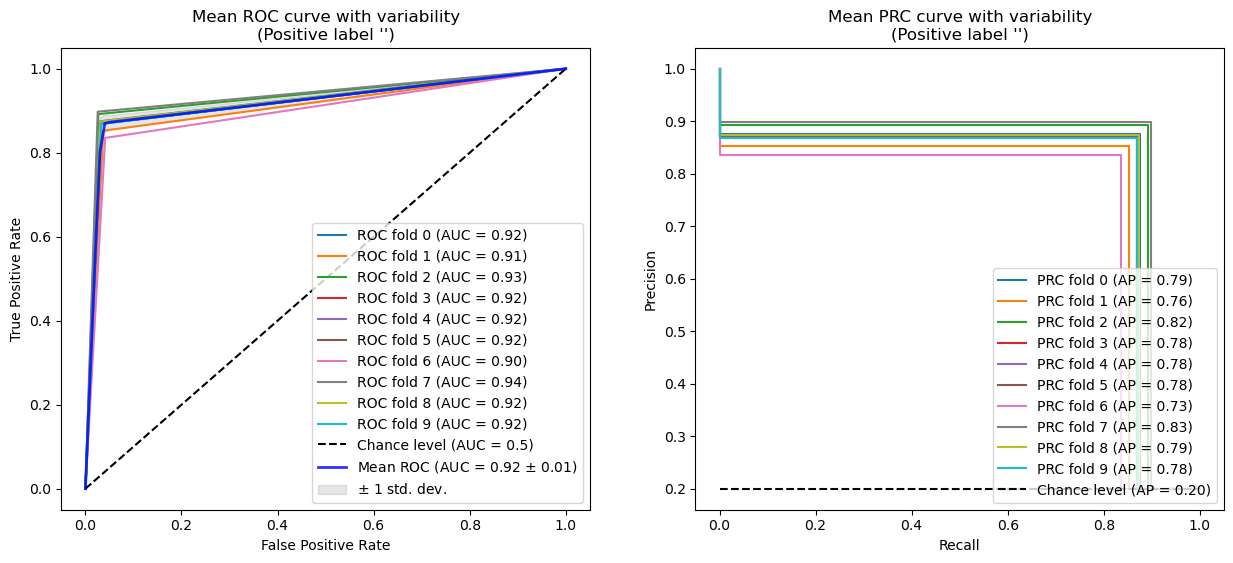

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1758 examples [00:00, 186621.10 examples/s]
Generating test split: 175 examples [00:00, 32005.02 examples/s]
Map: 100%|██████████| 175/175 [00:15<00:00, 11.31 examples/s]
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
 33%|███▎      | 220/660 [00:28<00:54,  8.12it/s]

{'eval_loss': 0.2572021782398224, 'eval_accuracy': 0.9257142857142857, 'eval_precision': 0.9043778040141677, 'eval_recall': 0.9257142857142857, 'eval_f1': 0.9116061307113938, 'eval_runtime': 0.4723, 'eval_samples_per_second': 370.54, 'eval_steps_per_second': 46.582, 'epoch': 1.0}


 67%|██████▋   | 440/660 [00:58<00:27,  8.10it/s]

{'eval_loss': 0.13798613846302032, 'eval_accuracy': 0.9485714285714286, 'eval_precision': 0.9396765053128691, 'eval_recall': 0.9485714285714286, 'eval_f1': 0.9439563233927515, 'eval_runtime': 0.4703, 'eval_samples_per_second': 372.091, 'eval_steps_per_second': 46.777, 'epoch': 2.0}


 76%|███████▌  | 501/660 [01:06<00:20,  7.82it/s]

{'loss': 0.258, 'grad_norm': 0.7072401642799377, 'learning_rate': 1.2121212121212122e-05, 'epoch': 2.27}


100%|██████████| 660/660 [01:28<00:00,  7.91it/s]

{'eval_loss': 0.0920126885175705, 'eval_accuracy': 0.9771428571428571, 'eval_precision': 0.9677922077922079, 'eval_recall': 0.9771428571428571, 'eval_f1': 0.972, 'eval_runtime': 0.4822, 'eval_samples_per_second': 362.897, 'eval_steps_per_second': 45.621, 'epoch': 3.0}


100%|██████████| 660/660 [01:30<00:00,  7.30it/s]

{'train_runtime': 90.3769, 'train_samples_per_second': 58.356, 'train_steps_per_second': 7.303, 'train_loss': 0.22078338969837535, 'epoch': 3.0}


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(29794, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [44]:
bert_class=BertProcessing()
bert_class.evaluate_alt(df_final["text"],df_final["Classe de Violência"], n_splits=10)

## Sampling os dados

### AdaBoost com sampling

In [7]:
best_model=ModelProcessing.adaboost_model_upsampled(df_final["text"],df_final["Classe de Violência"])

/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.

best recall: 0.05062662337662338
best accuracy: 0.05062662337662338
best f1: 0.006730100099507859
best precision: 0.004072032662525799


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Mean APS: 0.2932053307689604
stardard deviation APS: 0.039390597900274125


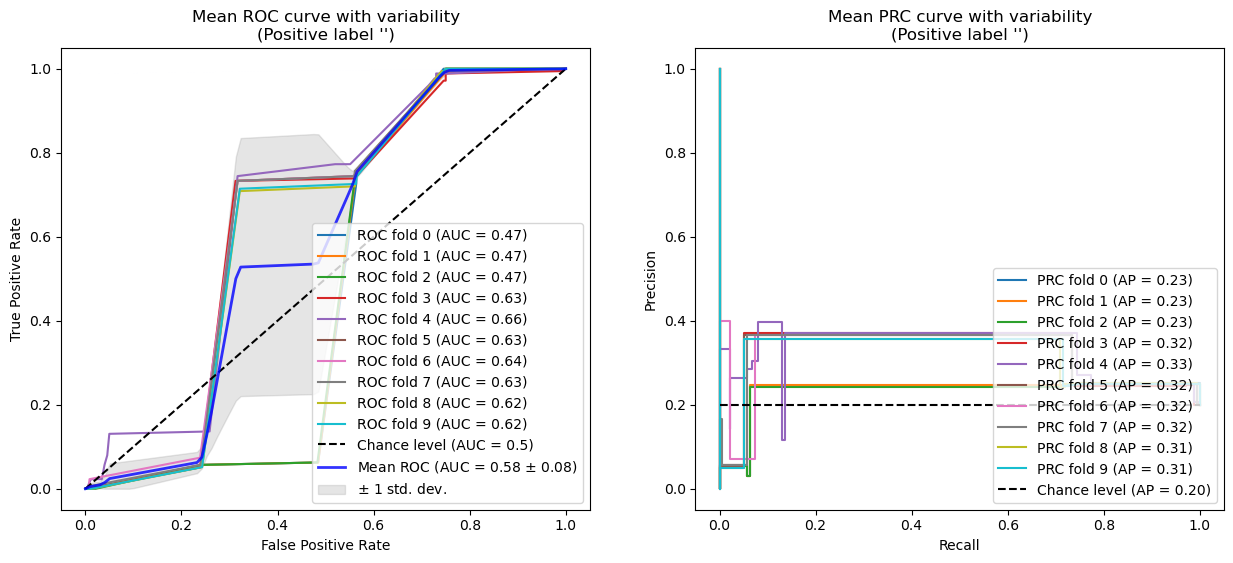

In [8]:
MetricsProcessing().evaluate_alt_upsampled(best_model,df_final["text"],df_final["Classe de Violência"],n_splits=10)

### Floresta Aleatoria com Sampling

In [7]:
best_model=ModelProcessing.forest_model_upsampled(df_final["text"],df_final["Classe de Violência"])

/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and bein

best recall: 0.7394805194805195
best accuracy: 0.7394805194805195
best f1: 0.6945522779765214
best precision: 0.7771418497415781


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Mean APS: 0.7845376103358269
stardard deviation APS: 0.029832591782460758


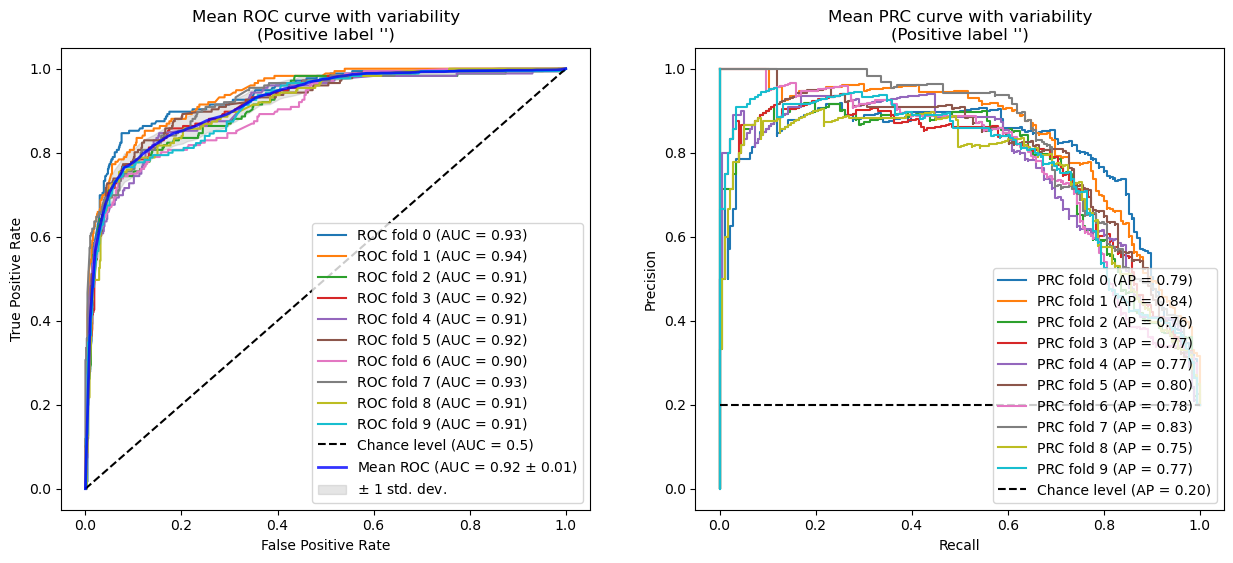

In [8]:
MetricsProcessing().evaluate_alt_upsampled(best_model,df_final["text"],df_final["Classe de Violência"],n_splits=10)

### Arvore de decisão com Sampling

In [7]:
best_model=ModelProcessing.tree_model_upsampled(df_final["text"],df_final["Classe de Violência"])

tree_model_upsampling=best_model

/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to

best recall: 0.7542727272727273
best accuracy: 0.7542727272727273
best f1: 0.7665103137171367
best precision: 0.802140085594794


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Mean APS: 0.676744820171644
stardard deviation APS: 0.04456456546570162


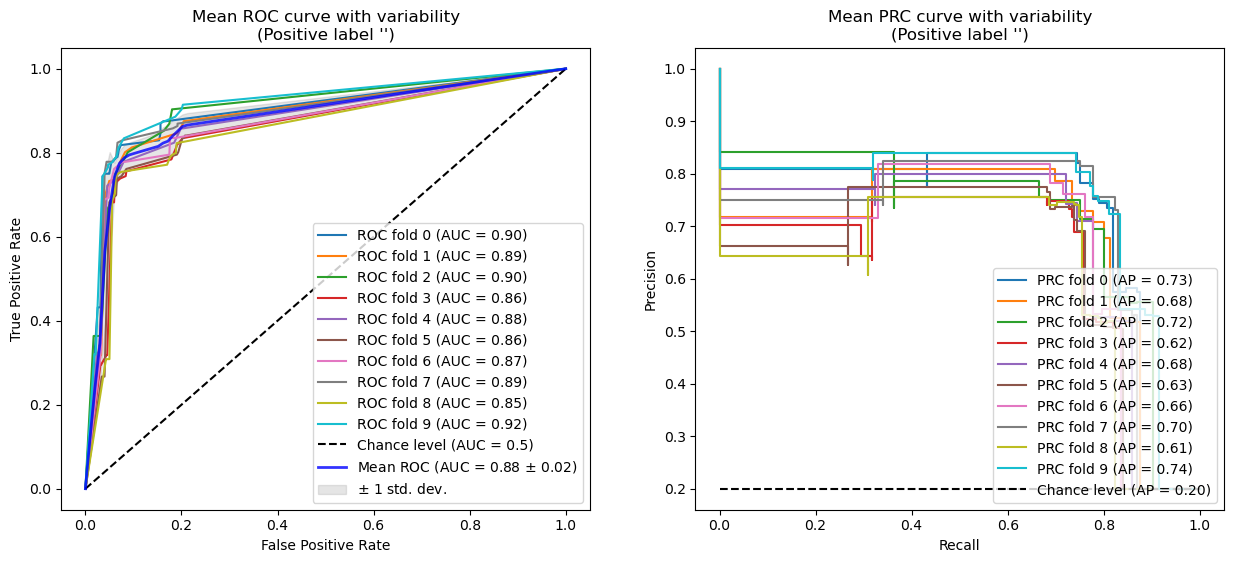

In [8]:
MetricsProcessing().evaluate_alt_upsampled(best_model,df_final["text"],df_final["Classe de Violência"],n_splits=10)

### Naive-Bayes com sampling

In [7]:
model=ModelProcessing.naivebayes_model_upsampled(df_final["text"],df_final["Classe de Violência"])

/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in lab

best recall: 0.7389025974025973
best accuracy: 0.7389025974025973
best f1: 0.7523016122850679
best precision: 0.774561456809151


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Mean APS: 0.5988484255355034
stardard deviation APS: 0.03246989212576648


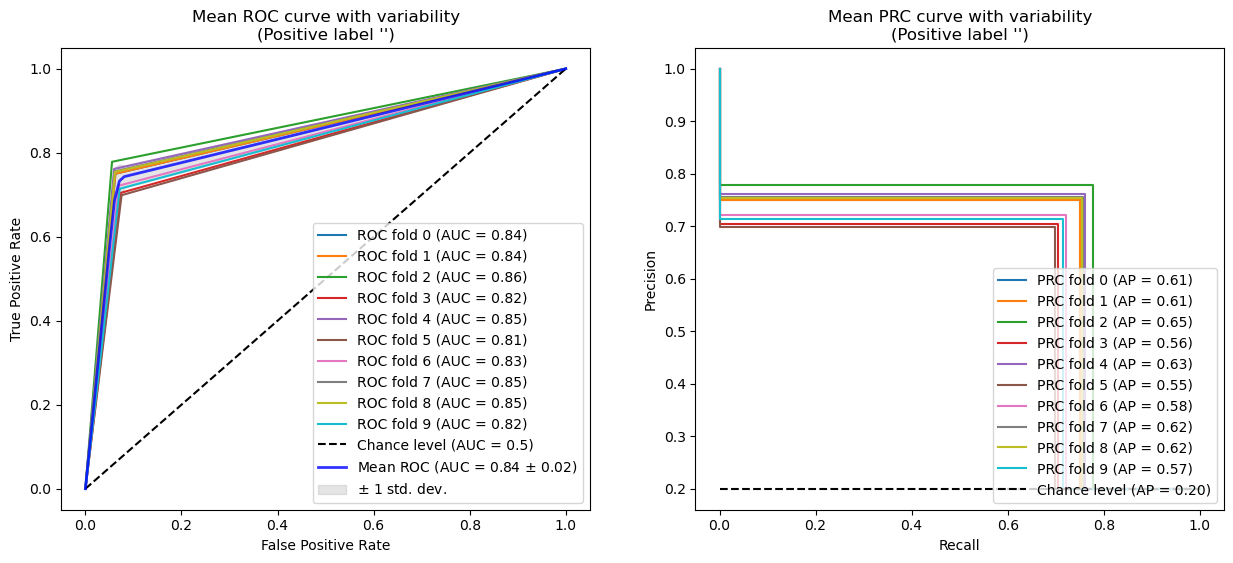

In [12]:
MetricsProcessing().evaluate_alt_upsampled(model,df_final["text"],df_final["Classe de Violência"],n_splits=10)

/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 4893 examples [00:00, 188593.36 examples/s]
Generating test split: 176 examples [00:00, 65675.93 examples/s]
Map:   0%|          | 0/4893 [00:00<?, ? examples/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by de

{'loss': 0.3179, 'grad_norm': 0.09989050030708313, 'learning_rate': 3.638344226579521e-05, 'epoch': 0.82}


                                                  
 33%|███▎      | 612/1836 [01:18<03:13,  6.34it/s]

{'eval_loss': 0.5862055420875549, 'eval_accuracy': 0.8863636363636364, 'eval_precision': 0.8855278493436388, 'eval_recall': 0.8863636363636364, 'eval_f1': 0.8815197152245345, 'eval_runtime': 0.6821, 'eval_samples_per_second': 258.03, 'eval_steps_per_second': 32.254, 'epoch': 1.0}


 55%|█████▍    | 1001/1836 [02:08<01:44,  7.96it/s]

{'loss': 0.1102, 'grad_norm': 0.04407249763607979, 'learning_rate': 2.2766884531590417e-05, 'epoch': 1.63}


                                                   
 67%|██████▋   | 1224/1836 [02:37<01:12,  8.46it/s]

{'eval_loss': 0.7405450344085693, 'eval_accuracy': 0.875, 'eval_precision': 0.8695309265704779, 'eval_recall': 0.875, 'eval_f1': 0.8690483117571048, 'eval_runtime': 0.536, 'eval_samples_per_second': 328.366, 'eval_steps_per_second': 41.046, 'epoch': 2.0}


 82%|████████▏ | 1501/1836 [03:13<00:43,  7.72it/s]

{'loss': 0.0467, 'grad_norm': 0.1318352222442627, 'learning_rate': 9.150326797385621e-06, 'epoch': 2.45}


                                                   
100%|██████████| 1836/1836 [03:58<00:00,  8.41it/s]

{'eval_loss': 0.7750900387763977, 'eval_accuracy': 0.8806818181818182, 'eval_precision': 0.8793059729526672, 'eval_recall': 0.8806818181818182, 'eval_f1': 0.8739357115913132, 'eval_runtime': 0.5483, 'eval_samples_per_second': 320.975, 'eval_steps_per_second': 40.122, 'epoch': 3.0}


100%|██████████| 1836/1836 [04:00<00:00,  7.65it/s]


{'train_runtime': 240.1097, 'train_samples_per_second': 61.135, 'train_steps_per_second': 7.647, 'train_loss': 0.13785750621803966, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 4893 examples [00:00, 363710.51 examples/s]
Generating test split: 176 examples [00:00, 60647.18 examples/s]


{'loss': 0.3243, 'grad_norm': 15.995865821838379, 'learning_rate': 3.638344226579521e-05, 'epoch': 0.82}


 33%|███▎      | 612/1836 [01:16<03:15,  6.26it/s]

{'eval_loss': 0.71920245885849, 'eval_accuracy': 0.8409090909090909, 'eval_precision': 0.8891132685911649, 'eval_recall': 0.8409090909090909, 'eval_f1': 0.858726071176664, 'eval_runtime': 0.5878, 'eval_samples_per_second': 299.429, 'eval_steps_per_second': 37.429, 'epoch': 1.0}


 55%|█████▍    | 1001/1836 [02:06<01:43,  8.04it/s]

{'loss': 0.0946, 'grad_norm': 0.022674182429909706, 'learning_rate': 2.2766884531590417e-05, 'epoch': 1.63}


 67%|██████▋   | 1224/1836 [02:34<01:12,  8.40it/s]

{'eval_loss': 0.6686630249023438, 'eval_accuracy': 0.8693181818181818, 'eval_precision': 0.8537847483095417, 'eval_recall': 0.8693181818181818, 'eval_f1': 0.8590783352194141, 'eval_runtime': 0.6441, 'eval_samples_per_second': 273.262, 'eval_steps_per_second': 34.158, 'epoch': 2.0}


 82%|████████▏ | 1501/1836 [03:10<00:42,  7.79it/s]

{'loss': 0.0584, 'grad_norm': 0.018733154982328415, 'learning_rate': 9.150326797385621e-06, 'epoch': 2.45}


100%|██████████| 1836/1836 [03:53<00:00,  8.37it/s]

{'eval_loss': 0.7666730284690857, 'eval_accuracy': 0.8806818181818182, 'eval_precision': 0.8558434959349593, 'eval_recall': 0.8806818181818182, 'eval_f1': 0.8640118004153091, 'eval_runtime': 0.636, 'eval_samples_per_second': 276.722, 'eval_steps_per_second': 34.59, 'epoch': 3.0}


100%|██████████| 1836/1836 [03:54<00:00,  7.82it/s]


{'train_runtime': 234.9015, 'train_samples_per_second': 62.49, 'train_steps_per_second': 7.816, 'train_loss': 0.13606652455132512, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 4893 examples [00:00, 371237.10 examples/s]
Generating test split: 176 examples [00:00, 66057.94 examples/s]


{'loss': 0.3265, 'grad_norm': 33.246334075927734, 'learning_rate': 3.638344226579521e-05, 'epoch': 0.82}


 33%|███▎      | 612/1836 [01:22<02:35,  7.85it/s]

{'eval_loss': 0.48449957370758057, 'eval_accuracy': 0.8863636363636364, 'eval_precision': 0.8891891475732939, 'eval_recall': 0.8863636363636364, 'eval_f1': 0.8873176715735699, 'eval_runtime': 0.5498, 'eval_samples_per_second': 320.122, 'eval_steps_per_second': 40.015, 'epoch': 1.0}


 55%|█████▍    | 1001/1836 [02:15<01:53,  7.39it/s]

{'loss': 0.1043, 'grad_norm': 0.02010837383568287, 'learning_rate': 2.2766884531590417e-05, 'epoch': 1.63}


 67%|██████▋   | 1224/1836 [02:45<01:18,  7.84it/s]

{'eval_loss': 0.5885912179946899, 'eval_accuracy': 0.8977272727272727, 'eval_precision': 0.9095153394111015, 'eval_recall': 0.8977272727272727, 'eval_f1': 0.9027209492635024, 'eval_runtime': 0.4657, 'eval_samples_per_second': 377.899, 'eval_steps_per_second': 47.237, 'epoch': 2.0}


 82%|████████▏ | 1501/1836 [03:23<00:44,  7.48it/s]

{'loss': 0.053, 'grad_norm': 0.008564353920519352, 'learning_rate': 9.150326797385621e-06, 'epoch': 2.45}


100%|██████████| 1836/1836 [04:09<00:00,  7.86it/s]

{'eval_loss': 0.5986678004264832, 'eval_accuracy': 0.8920454545454546, 'eval_precision': 0.9013422266139659, 'eval_recall': 0.8920454545454546, 'eval_f1': 0.8957166853303472, 'eval_runtime': 0.4794, 'eval_samples_per_second': 367.099, 'eval_steps_per_second': 45.887, 'epoch': 3.0}


100%|██████████| 1836/1836 [04:11<00:00,  7.31it/s]


{'train_runtime': 251.2488, 'train_samples_per_second': 58.424, 'train_steps_per_second': 7.307, 'train_loss': 0.14094411937239903, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 4596 examples [00:00, 655168.45 examples/s]
Generating test split: 176 examples [00:00, 87609.48 examples/s]


{'loss': 0.3152, 'grad_norm': 0.1113889068365097, 'learning_rate': 3.5507246376811596e-05, 'epoch': 0.87}


 33%|███▎      | 575/1725 [01:16<07:19,  2.62it/s]

{'eval_loss': 0.7517011761665344, 'eval_accuracy': 0.8465909090909091, 'eval_precision': 0.8796994833019979, 'eval_recall': 0.8465909090909091, 'eval_f1': 0.860927856728252, 'eval_runtime': 0.5713, 'eval_samples_per_second': 308.051, 'eval_steps_per_second': 38.506, 'epoch': 1.0}


 58%|█████▊    | 1001/1725 [02:14<01:35,  7.58it/s]

{'loss': 0.1114, 'grad_norm': 0.20860320329666138, 'learning_rate': 2.101449275362319e-05, 'epoch': 1.74}


 67%|██████▋   | 1150/1725 [02:34<01:10,  8.10it/s]

{'eval_loss': 0.7352724671363831, 'eval_accuracy': 0.875, 'eval_precision': 0.8681818181818183, 'eval_recall': 0.875, 'eval_f1': 0.8715055642169777, 'eval_runtime': 0.4867, 'eval_samples_per_second': 361.644, 'eval_steps_per_second': 45.206, 'epoch': 2.0}


 87%|████████▋ | 1501/1725 [03:21<00:29,  7.59it/s]

{'loss': 0.0457, 'grad_norm': 1.2256332635879517, 'learning_rate': 6.521739130434783e-06, 'epoch': 2.61}


100%|██████████| 1725/1725 [03:53<00:00,  8.14it/s]

{'eval_loss': 0.8213478326797485, 'eval_accuracy': 0.8693181818181818, 'eval_precision': 0.8626813687724706, 'eval_recall': 0.8693181818181818, 'eval_f1': 0.8655732055668117, 'eval_runtime': 0.509, 'eval_samples_per_second': 345.792, 'eval_steps_per_second': 43.224, 'epoch': 3.0}


100%|██████████| 1725/1725 [03:54<00:00,  7.34it/s]


{'train_runtime': 234.9397, 'train_samples_per_second': 58.687, 'train_steps_per_second': 7.342, 'train_loss': 0.1442407392418903, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 4596 examples [00:00, 480951.60 examples/s]
Generating test split: 176 examples [00:00, 77290.07 examples/s]


{'loss': 0.3185, 'grad_norm': 0.34545883536338806, 'learning_rate': 3.5507246376811596e-05, 'epoch': 0.87}


 33%|███▎      | 575/1725 [01:12<02:16,  8.45it/s]

{'eval_loss': 0.6882174611091614, 'eval_accuracy': 0.8693181818181818, 'eval_precision': 0.8708641780265416, 'eval_recall': 0.8693181818181818, 'eval_f1': 0.8673479441520677, 'eval_runtime': 0.5423, 'eval_samples_per_second': 324.523, 'eval_steps_per_second': 40.565, 'epoch': 1.0}


 58%|█████▊    | 1001/1725 [02:07<01:31,  7.95it/s]

{'loss': 0.099, 'grad_norm': 0.06877235323190689, 'learning_rate': 2.101449275362319e-05, 'epoch': 1.74}


 67%|██████▋   | 1150/1725 [02:26<01:08,  8.41it/s]

{'eval_loss': 0.7603580951690674, 'eval_accuracy': 0.8863636363636364, 'eval_precision': 0.8725155094249583, 'eval_recall': 0.8863636363636364, 'eval_f1': 0.8768577658571538, 'eval_runtime': 0.4682, 'eval_samples_per_second': 375.901, 'eval_steps_per_second': 46.988, 'epoch': 2.0}


 87%|████████▋ | 1501/1725 [03:11<00:28,  7.94it/s]

{'loss': 0.0465, 'grad_norm': 0.02324267290532589, 'learning_rate': 6.521739130434783e-06, 'epoch': 2.61}


100%|██████████| 1725/1725 [03:41<00:00,  8.46it/s]

{'eval_loss': 0.6873229146003723, 'eval_accuracy': 0.8977272727272727, 'eval_precision': 0.8816292592424997, 'eval_recall': 0.8977272727272727, 'eval_f1': 0.8832885304659498, 'eval_runtime': 0.493, 'eval_samples_per_second': 357.023, 'eval_steps_per_second': 44.628, 'epoch': 3.0}


100%|██████████| 1725/1725 [03:43<00:00,  7.73it/s]


{'train_runtime': 223.1376, 'train_samples_per_second': 61.791, 'train_steps_per_second': 7.731, 'train_loss': 0.13771885830423106, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 4596 examples [00:00, 352536.00 examples/s]
Generating test split: 176 examples [00:00, 55204.72 examples/s]


{'loss': 0.3341, 'grad_norm': 0.026589903980493546, 'learning_rate': 3.5507246376811596e-05, 'epoch': 0.87}


 33%|███▎      | 575/1725 [01:13<02:16,  8.45it/s]

{'eval_loss': 0.7669906616210938, 'eval_accuracy': 0.8238636363636364, 'eval_precision': 0.8231112852664576, 'eval_recall': 0.8238636363636364, 'eval_f1': 0.822585073599318, 'eval_runtime': 0.5885, 'eval_samples_per_second': 299.08, 'eval_steps_per_second': 37.385, 'epoch': 1.0}


 58%|█████▊    | 1001/1725 [02:07<01:31,  7.94it/s]

{'loss': 0.0947, 'grad_norm': 0.033404137939214706, 'learning_rate': 2.101449275362319e-05, 'epoch': 1.74}


 67%|██████▋   | 1150/1725 [02:27<01:09,  8.28it/s]

{'eval_loss': 0.9202069640159607, 'eval_accuracy': 0.8522727272727273, 'eval_precision': 0.8375946969696969, 'eval_recall': 0.8522727272727273, 'eval_f1': 0.8445419669844224, 'eval_runtime': 0.4829, 'eval_samples_per_second': 364.478, 'eval_steps_per_second': 45.56, 'epoch': 2.0}


 87%|████████▋ | 1501/1725 [03:13<00:28,  7.84it/s]

{'loss': 0.0383, 'grad_norm': 0.018321363255381584, 'learning_rate': 6.521739130434783e-06, 'epoch': 2.61}


100%|██████████| 1725/1725 [03:43<00:00,  8.35it/s]

{'eval_loss': 0.9385492205619812, 'eval_accuracy': 0.8636363636363636, 'eval_precision': 0.8457799553387789, 'eval_recall': 0.8636363636363636, 'eval_f1': 0.8520505601441793, 'eval_runtime': 0.5102, 'eval_samples_per_second': 344.957, 'eval_steps_per_second': 43.12, 'epoch': 3.0}


100%|██████████| 1725/1725 [03:44<00:00,  7.67it/s]


{'train_runtime': 224.8298, 'train_samples_per_second': 61.326, 'train_steps_per_second': 7.672, 'train_loss': 0.13980139580325804, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 4596 examples [00:00, 350969.89 examples/s]
Generating test split: 176 examples [00:00, 38707.86 examples/s]


{'loss': 0.3375, 'grad_norm': 0.033969856798648834, 'learning_rate': 3.5507246376811596e-05, 'epoch': 0.87}


 33%|███▎      | 575/1725 [01:16<02:23,  7.99it/s]

{'eval_loss': 0.7430069446563721, 'eval_accuracy': 0.8522727272727273, 'eval_precision': 0.8189855875831484, 'eval_recall': 0.8522727272727273, 'eval_f1': 0.8337223071046599, 'eval_runtime': 0.5808, 'eval_samples_per_second': 303.014, 'eval_steps_per_second': 37.877, 'epoch': 1.0}


 58%|█████▊    | 1001/1725 [02:11<01:32,  7.85it/s]

{'loss': 0.0811, 'grad_norm': 28.055156707763672, 'learning_rate': 2.101449275362319e-05, 'epoch': 1.74}


 67%|██████▋   | 1150/1725 [02:31<01:09,  8.26it/s]

{'eval_loss': 0.7586271166801453, 'eval_accuracy': 0.8636363636363636, 'eval_precision': 0.8112673590850741, 'eval_recall': 0.8636363636363636, 'eval_f1': 0.8355118260024096, 'eval_runtime': 0.4815, 'eval_samples_per_second': 365.519, 'eval_steps_per_second': 45.69, 'epoch': 2.0}


 87%|████████▋ | 1501/1725 [03:17<00:28,  7.83it/s]

{'loss': 0.0505, 'grad_norm': 0.02935589849948883, 'learning_rate': 6.521739130434783e-06, 'epoch': 2.61}


100%|██████████| 1725/1725 [03:47<00:00,  6.88it/s]

{'eval_loss': 0.7704973816871643, 'eval_accuracy': 0.8693181818181818, 'eval_precision': 0.8362868720426859, 'eval_recall': 0.8693181818181818, 'eval_f1': 0.8512008620407332, 'eval_runtime': 0.4922, 'eval_samples_per_second': 357.61, 'eval_steps_per_second': 44.701, 'epoch': 3.0}


100%|██████████| 1725/1725 [03:48<00:00,  7.54it/s]


{'train_runtime': 228.7234, 'train_samples_per_second': 60.282, 'train_steps_per_second': 7.542, 'train_loss': 0.1399556452986123, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 4596 examples [00:00, 320498.47 examples/s]
Generating test split: 176 examples [00:00, 58867.42 examples/s]


{'loss': 0.3297, 'grad_norm': 0.03291981294751167, 'learning_rate': 3.5507246376811596e-05, 'epoch': 0.87}


 33%|███▎      | 575/1725 [01:13<02:18,  8.33it/s]

{'eval_loss': 0.5683827996253967, 'eval_accuracy': 0.8863636363636364, 'eval_precision': 0.8762845849802371, 'eval_recall': 0.8863636363636364, 'eval_f1': 0.8760161646863776, 'eval_runtime': 0.4826, 'eval_samples_per_second': 364.654, 'eval_steps_per_second': 45.582, 'epoch': 1.0}


 58%|█████▊    | 1001/1725 [02:08<01:31,  7.95it/s]

{'loss': 0.0944, 'grad_norm': 0.04918909817934036, 'learning_rate': 2.101449275362319e-05, 'epoch': 1.74}


 67%|██████▋   | 1150/1725 [02:28<01:09,  8.30it/s]

{'eval_loss': 0.5816183686256409, 'eval_accuracy': 0.9034090909090909, 'eval_precision': 0.8902113174958352, 'eval_recall': 0.9034090909090909, 'eval_f1': 0.8966264426052075, 'eval_runtime': 0.4771, 'eval_samples_per_second': 368.9, 'eval_steps_per_second': 46.113, 'epoch': 2.0}


 87%|████████▋ | 1501/1725 [03:13<00:28,  7.85it/s]

{'loss': 0.0433, 'grad_norm': 0.2729550302028656, 'learning_rate': 6.521739130434783e-06, 'epoch': 2.61}


100%|██████████| 1725/1725 [03:44<00:00,  7.76it/s]

{'eval_loss': 0.5825609564781189, 'eval_accuracy': 0.9090909090909091, 'eval_precision': 0.8883957320719422, 'eval_recall': 0.9090909090909091, 'eval_f1': 0.8972407450221666, 'eval_runtime': 0.5719, 'eval_samples_per_second': 307.76, 'eval_steps_per_second': 38.47, 'epoch': 3.0}


100%|██████████| 1725/1725 [03:46<00:00,  7.61it/s]


{'train_runtime': 226.7359, 'train_samples_per_second': 60.811, 'train_steps_per_second': 7.608, 'train_loss': 0.14232610896013786, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 4836 examples [00:00, 437053.53 examples/s]
Generating test split: 175 examples [00:00, 47437.68 examples/s]


{'loss': 0.3146, 'grad_norm': 0.09431162476539612, 'learning_rate': 3.622589531680441e-05, 'epoch': 0.83}


 33%|███▎      | 605/1815 [01:17<02:24,  8.37it/s]

{'eval_loss': 0.709108293056488, 'eval_accuracy': 0.8628571428571429, 'eval_precision': 0.8895410941145967, 'eval_recall': 0.8628571428571429, 'eval_f1': 0.8706610085125409, 'eval_runtime': 0.6997, 'eval_samples_per_second': 250.109, 'eval_steps_per_second': 31.442, 'epoch': 1.0}


 55%|█████▌    | 1001/1815 [02:09<01:43,  7.85it/s]

{'loss': 0.1207, 'grad_norm': 0.03523940593004227, 'learning_rate': 2.2451790633608817e-05, 'epoch': 1.65}


 67%|██████▋   | 1210/1815 [02:36<01:12,  8.32it/s]

{'eval_loss': 0.5563260316848755, 'eval_accuracy': 0.9028571428571428, 'eval_precision': 0.9110572186434255, 'eval_recall': 0.9028571428571428, 'eval_f1': 0.9054897644728154, 'eval_runtime': 0.5309, 'eval_samples_per_second': 329.635, 'eval_steps_per_second': 41.44, 'epoch': 2.0}


 83%|████████▎ | 1501/1815 [03:14<00:39,  7.96it/s]

{'loss': 0.0523, 'grad_norm': 0.0743149071931839, 'learning_rate': 8.677685950413224e-06, 'epoch': 2.48}


100%|██████████| 1815/1815 [03:57<00:00,  8.23it/s]

{'eval_loss': 0.5916919708251953, 'eval_accuracy': 0.8914285714285715, 'eval_precision': 0.890327084680026, 'eval_recall': 0.8914285714285715, 'eval_f1': 0.8876580239024325, 'eval_runtime': 0.545, 'eval_samples_per_second': 321.093, 'eval_steps_per_second': 40.366, 'epoch': 3.0}


100%|██████████| 1815/1815 [03:58<00:00,  7.60it/s]


{'train_runtime': 238.8725, 'train_samples_per_second': 60.735, 'train_steps_per_second': 7.598, 'train_loss': 0.14159013312053417, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 4836 examples [00:00, 389149.78 examples/s]
Generating test split: 175 examples [00:00, 56965.71 examples/s]


{'loss': 0.3168, 'grad_norm': 0.9019176363945007, 'learning_rate': 3.622589531680441e-05, 'epoch': 0.83}


 33%|███▎      | 605/1815 [01:18<02:26,  8.26it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

 33%|███▎      | 605/1815 [01:18<02:26,  8.26it/s]

{'eval_loss': 0.6135945320129395, 'eval_accuracy': 0.8628571428571429, 'eval_precision': 0.8606390417414039, 'eval_recall': 0.8628571428571429, 'eval_f1': 0.8591405342624856, 'eval_runtime': 0.5671, 'eval_samples_per_second': 308.572, 'eval_steps_per_second': 38.792, 'epoch': 1.0}


 55%|█████▌    | 1001/1815 [02:10<01:43,  7.89it/s]

{'loss': 0.0919, 'grad_norm': 3.7677996158599854, 'learning_rate': 2.2451790633608817e-05, 'epoch': 1.65}


 67%|██████▋   | 1210/1815 [02:36<01:12,  8.37it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

 67%|██████▋   | 1210/1815 [02:37<01:12,  8.37it/s]

{'eval_loss': 0.7877758145332336, 'eval_accuracy': 0.8628571428571429, 'eval_precision': 0.8496610169491526, 'eval_recall': 0.8628571428571429, 'eval_f1': 0.8523081225182231, 'eval_runtime': 0.4701, 'eval_samples_per_second': 372.298, 'eval_steps_per_second': 46.803, 'epoch': 2.0}


 83%|████████▎ | 1501/1815 [03:16<00:41,  7.56it/s]

{'loss': 0.0483, 'grad_norm': 0.15173110365867615, 'learning_rate': 8.677685950413224e-06, 'epoch': 2.48}


100%|██████████| 1815/1815 [03:57<00:00,  8.09it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

100%|██████████| 1815/1815 [03:59<00:00,  8.09it/s]

{'eval_loss': 0.8037329912185669, 'eval_accuracy': 0.88, 'eval_precision': 0.8637142857142858, 'eval_recall': 0.88, 'eval_f1': 0.8684021769905936, 'eval_runtime': 0.4962, 'eval_samples_per_second': 352.69, 'eval_steps_per_second': 44.338, 'epoch': 3.0}


100%|██████████| 1815/1815 [04:00<00:00,  7.54it/s]


{'train_runtime': 240.673, 'train_samples_per_second': 60.281, 'train_steps_per_second': 7.541, 'train_loss': 0.13062847442206602, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Mean APS: 0.7751028486043177
stardard deviation APS: 0.03127437858167557


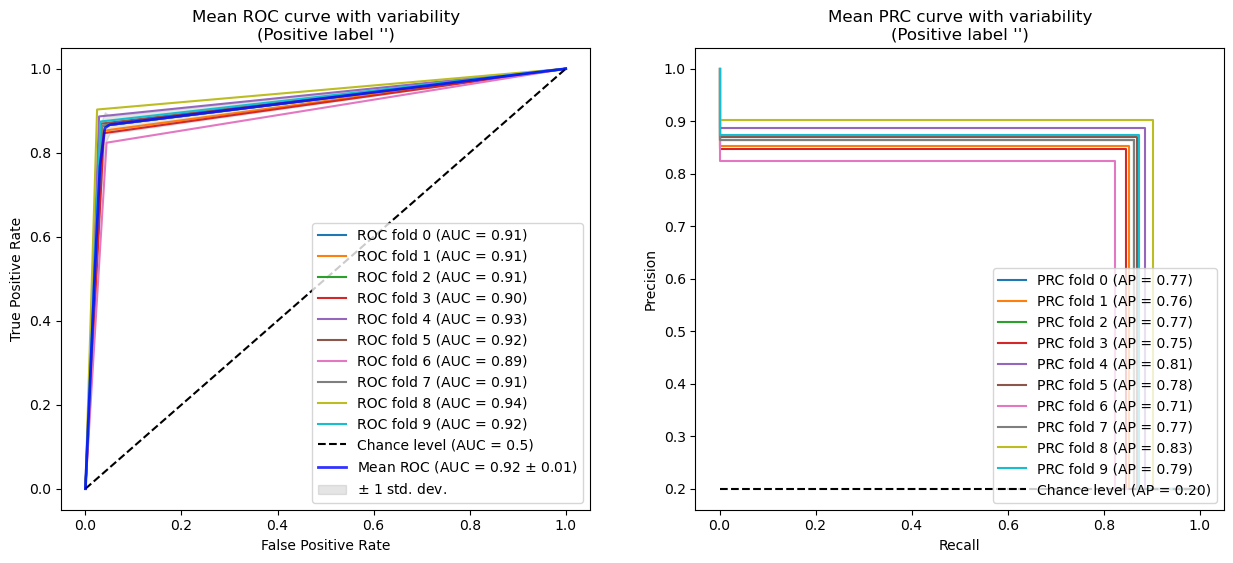

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 5259 examples [00:00, 339706.84 examples/s]
Generating test split: 175 examples [00:00, 64812.64 examples/s]
Map: 100%|██████████| 175/175 [00:16<00:00, 10.51 examples/s]
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
 25%|██▌       | 501/1974 [01:04<03:04,  7.98it/s]

{'loss': 0.1288, 'grad_norm': 0.02588900364935398, 'learning_rate': 3.733535967578521e-05, 'epoch': 0.76}


 33%|███▎      | 658/1974 [01:24<07:54,  2.77it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

 33%|███▎      | 658/1974 [01:25<07:54,  2.77it/s]

{'eval_loss': 0.3128068745136261, 'eval_accuracy': 0.9485714285714286, 'eval_precision': 0.9600541125541125, 'eval_recall': 0.9485714285714286, 'eval_f1': 0.9526105292556905, 'eval_runtime': 0.4749, 'eval_samples_per_second': 368.466, 'eval_steps_per_second': 46.321, 'epoch': 1.0}


 51%|█████     | 1001/1974 [02:10<02:02,  7.96it/s]

{'loss': 0.0864, 'grad_norm': 0.010041892528533936, 'learning_rate': 2.4670719351570416e-05, 'epoch': 1.52}


 67%|██████▋   | 1316/1974 [02:50<01:19,  8.32it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

 67%|██████▋   | 1316/1974 [02:51<01:19,  8.32it/s]

{'eval_loss': 0.1024470403790474, 'eval_accuracy': 0.9771428571428571, 'eval_precision': 0.9850103519668736, 'eval_recall': 0.9771428571428571, 'eval_f1': 0.9805561976017904, 'eval_runtime': 0.4701, 'eval_samples_per_second': 372.298, 'eval_steps_per_second': 46.803, 'epoch': 2.0}


 76%|███████▌  | 1501/1974 [03:17<01:03,  7.49it/s]

{'loss': 0.0443, 'grad_norm': 0.006731972564011812, 'learning_rate': 1.2006079027355625e-05, 'epoch': 2.28}


100%|██████████| 1974/1974 [04:20<00:00,  7.97it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

100%|██████████| 1974/1974 [04:22<00:00,  7.97it/s]

{'eval_loss': 0.09201925247907639, 'eval_accuracy': 0.9828571428571429, 'eval_precision': 0.9904761904761904, 'eval_recall': 0.9828571428571429, 'eval_f1': 0.9862372881355931, 'eval_runtime': 0.5081, 'eval_samples_per_second': 344.416, 'eval_steps_per_second': 43.298, 'epoch': 3.0}


100%|██████████| 1974/1974 [04:23<00:00,  7.48it/s]

{'train_runtime': 263.8223, 'train_samples_per_second': 59.802, 'train_steps_per_second': 7.482, 'train_loss': 0.07136646713287756, 'epoch': 3.0}


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(29794, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [27]:
bert_class=BertProcessing()
bert_class.evaluate_alt_upsampled(df_final["text"],df_final["Classe de Violência"], n_splits=10)

## Analise da complexidade dos dados sem sampling vs com sampling usando PCA

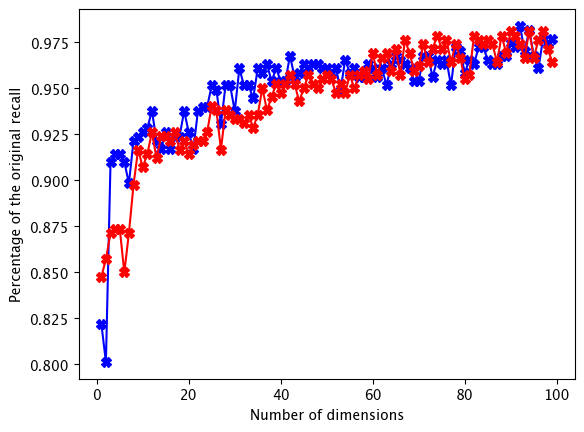

In [ ]:
#MetricsProcessing.pca_evaluator(model=tree_model,model2=tree_model_upsampling,test_data=test_data,test_target=test_target,n_components=100)

# Conclusões

Por enquanto o melhor modelo entre eles, sem contar o XGBoost, parece ser a arvore de decisão.

Parece valer a pena testar a vetorização com por NILC quando testarmos regressão.

Normalização da uma pequena melhora em alguns dos modelos, mas talvez seja por coincidencia (a seed ser boa para aquele novo formato de matriz especifica)